## Digit Recognizer

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this lab, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

Dataset:
https://www.kaggle.com/c/digit-recognizer/data

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import the train data
train  = pd.read_csv('train.csv')

In [3]:
#Check the shape of the data
train.shape

(42000, 785)

In [4]:
#Select only 10% of the data for experiment. We will not use total data as KNN is very slow
train = train.sample(frac = 0.1 , random_state = 1)

In [5]:
#Print shape of selected dataset
train.shape

(4200, 785)

In [6]:
#Look at top 5 rwos
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29633,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36369,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16624,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14389,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Find number of unique class labels
pd.unique(train['label'])

array([1, 5, 2, 8, 4, 0, 7, 9, 6, 3], dtype=int64)

In [8]:
#Print the number of examples for each class label
train['label'].value_counts()

1    488
4    426
3    423
2    421
0    420
9    414
8    411
7    403
6    403
5    391
Name: label, dtype: int64

In [9]:
#Prepare X and y
X = train[train.columns[1:]].as_matrix()
y = train['label'].as_matrix()

C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


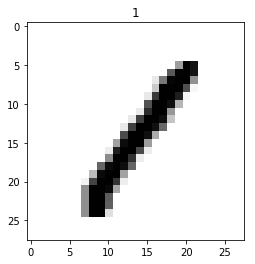

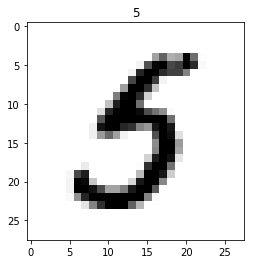

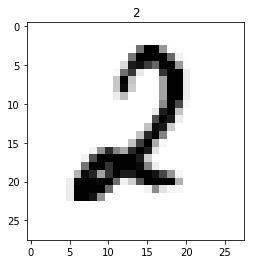

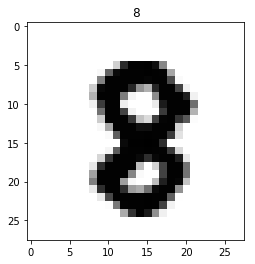

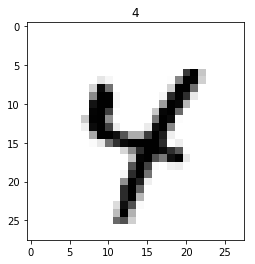

In [10]:
#Visualize the images of the first 5 digits in X - also print the class label in y
for i in range(0,5,1):
    d = X[i]
    d.shape = (28,28)
    plt.figure(i)
    plt.title(y[i])
    plt.imshow(255-d,cmap = 'gray')
    plt.show()


In [11]:
#Split the train dataset into training set (75%) and validation set(25%)
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25 , random_state = 0)

C:\Users\Sairam Ganja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
#Fit KNN classifier to the training data
#Default parameters - n_neighbors=5, metric = 'minkowski', p=2

from sklearn.neighbors import KNeighborsClassifier
Classifier  = KNeighborsClassifier(n_neighbors = 5 ,metric = 'minkowski' , p =2)
Classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
#Predict the validation set results
y_pred = Classifier.predict(X_test)

In [14]:
#Print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[103,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 113,   0,   0,   0,   1,   0,   0,   0,   0],
       [  7,   7,  92,   0,   1,   0,   0,   2,   2,   0],
       [  0,   3,   1, 104,   0,   3,   0,   2,   0,   0],
       [  0,   1,   0,   0,  88,   0,   0,   2,   0,   7],
       [  2,   0,   0,  11,   1,  92,   2,   0,   0,   1],
       [  0,   0,   0,   0,   0,   2, 104,   0,   1,   0],
       [  0,   4,   0,   0,   1,   1,   0,  94,   0,   2],
       [  0,   4,   0,   1,   1,   2,   1,   0,  84,   2],
       [  1,   1,   0,   2,   2,   0,   0,   1,   0,  90]], dtype=int64)

In [15]:
# Printing classification report and accuracy
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95       104
          1       0.85      0.99      0.91       114
          2       0.99      0.83      0.90       111
          3       0.88      0.92      0.90       113
          4       0.94      0.90      0.92        98
          5       0.91      0.84      0.88       109
          6       0.96      0.97      0.97       107
          7       0.93      0.92      0.93       102
          8       0.97      0.88      0.92        95
          9       0.88      0.93      0.90        97

avg / total       0.92      0.92      0.92      1050

0.9180952380952381


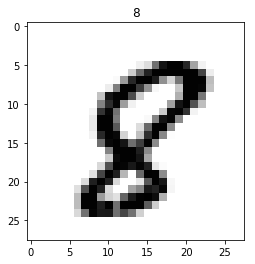

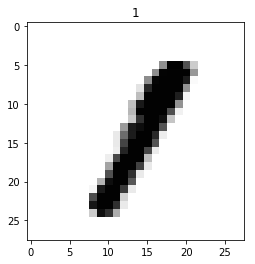

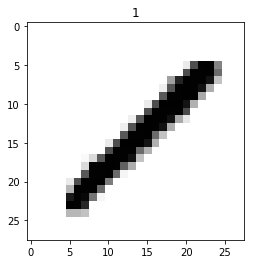

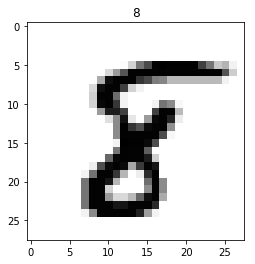

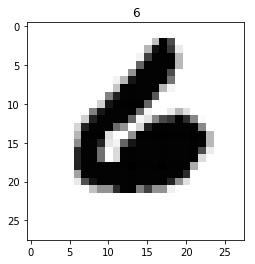

In [16]:
#Visualize the image of the first 5 digits in X_test - also print the predicted class label in y_pred
for i in range(0,5,1):
    d = X_test[i]
    d.shape = (28,28)
    plt.figure(i)
    plt.title(y_pred[i])
    plt.imshow(255-d,cmap = 'gray')
    plt.show

In [17]:
len(X_train)

3150

In [18]:
#Implement your own KNN classifier using Euclidean distance
class MyKNN:
    def __init__(self, n_neighbors):
        #Initialize
        self.n_neighbors = n_neighbors
                
    def fit(X_train,y_train):
        #Fit the data
        data1 = X_train
        data2 = y_train
        
    def euclidean_distance(X_test[0],X_train[0]):
        distance = 0
        length = X_train.shape[1]
        for i in range(length):
            distance +=  np.square(data1[i]-data2[i])
        return np.sqrt(distance)  
    
    def pred(X_test):
        #Make prediction
        
        for i in range(len(X_train)):
            dist = euclidean_distance(X_test[0],X_train[i])
        print(dist)
            
            
      

SyntaxError: invalid syntax (<ipython-input-18-e77693f9b2a0>, line 12)

In [ ]:
MyKNN(5)

In [ ]:
MyKNN.pred(X_test)

In [ ]:
data = X_test[0]
data[0]

In [ ]:
a = np.array([1,0,0,1,0,0])
b = np.array([3,0,0,0,1,1])

In [ ]:
def euclidean(a,b):
    distance = 0
    for i in range(6):
        distance +=  np.square(a[i]-b[i])
    return np.sqrt(distance)

In [ ]:
#Fit your model and make prediction
euclidean(a,b)

In [ ]:
X_test[0]